In [1]:
import os
from pathlib import Path
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr

from scipy.integrate import trapezoid

In [2]:
parent = os.path.join(Path(os.getcwd()).parent)

print(parent)

sys.path.append(parent)

c:\Users\bruij_kn\OneDrive - Stichting Deltares\Documents\GitHub\thermo-morphological-model\test


In [3]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [5]:
folder_path = Path("c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/sa_base")

In [6]:
output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000840', '0000

In [7]:
# comp_times = []
# timestep_ids = []
# timestamps = []

# i = 1

# for output_id in output_ids:
    
#     fname = str(output_id + '.nc')
    
#     ds = xr.load_dataset(os.path.join(folder_path, fname))
    
#     comp_time = ds.cumulative_computational_time.values
#     timestep_id = ds.timestep_id.values
#     timestamp = ds.timestamp.values
    
#     ds.close()
    
#     comp_times.append(comp_time)
#     timestep_ids.append(timestep_id)
#     timestamps.append(timestamp)
    
#     print(f'finished {i}/{len(output_ids)}')
    
#     i += 1
    
# comp_times = np.array(comp_times)
# timestep_ids = np.array(timestep_ids)
# timestamps = np.array(timestamps)
    
# np.savetxt('sa_base_computation-times.txt', comp_times)
# np.savetxt('sa_base_timestep-ids.txt', timestep_ids)
# np.savetxt('sa_base_timestamps.txt', timestamps)

comp_times = np.loadtxt('sa_base_computation-times.txt')
timestep_ids = np.loadtxt('sa_base_timestep-ids.txt')
timestamps = pd.to_datetime(np.loadtxt('sa_base_timestamps.txt', ))

In [8]:
xbeach_times = np.loadtxt(os.path.join(folder_path, Path("xbeach_times.txt")))[::12]

In [9]:
gradient = np.gradient(comp_times, np.float32(timestamps))

avg_gradient = np.mean(gradient)

xbeach_activation_gradient = (gradient > avg_gradient)

date_pairs = []

for i in range(len(xbeach_activation_gradient)):
    
    if xbeach_activation_gradient[i] == 1 and xbeach_activation_gradient[i-1] == 0:
        date1 = timestamps[i]
        
        for j in range(len(xbeach_activation_gradient[i:])):
            if xbeach_activation_gradient[i:][j+1] == 0:
                
                date2 = timestamps[i:][j]
                                
                date_pairs.append((date1, date2))
                
                break
            
    
print(date_pairs)

[(Timestamp('2017-05-28 00:00:00'), Timestamp('2017-05-28 12:00:00')), (Timestamp('2017-06-04 00:00:00'), Timestamp('2017-06-04 12:00:00')), (Timestamp('2017-06-18 00:00:00'), Timestamp('2017-06-18 12:00:00')), (Timestamp('2017-06-24 12:00:00'), Timestamp('2017-06-26 12:00:00')), (Timestamp('2017-07-02 00:00:00'), Timestamp('2017-07-02 12:00:00')), (Timestamp('2017-07-09 00:00:00'), Timestamp('2017-07-09 12:00:00')), (Timestamp('2017-07-16 00:00:00'), Timestamp('2017-07-16 12:00:00')), (Timestamp('2017-07-21 00:00:00'), Timestamp('2017-07-26 00:00:00')), (Timestamp('2017-07-30 00:00:00'), Timestamp('2017-07-30 12:00:00')), (Timestamp('2017-08-02 12:00:00'), Timestamp('2017-08-03 00:00:00')), (Timestamp('2017-08-06 00:00:00'), Timestamp('2017-08-06 12:00:00')), (Timestamp('2017-08-10 00:00:00'), Timestamp('2017-08-13 12:00:00')), (Timestamp('2017-08-20 00:00:00'), Timestamp('2017-08-20 12:00:00')), (Timestamp('2017-08-27 00:00:00'), Timestamp('2017-08-27 12:00:00')), (Timestamp('2017-09

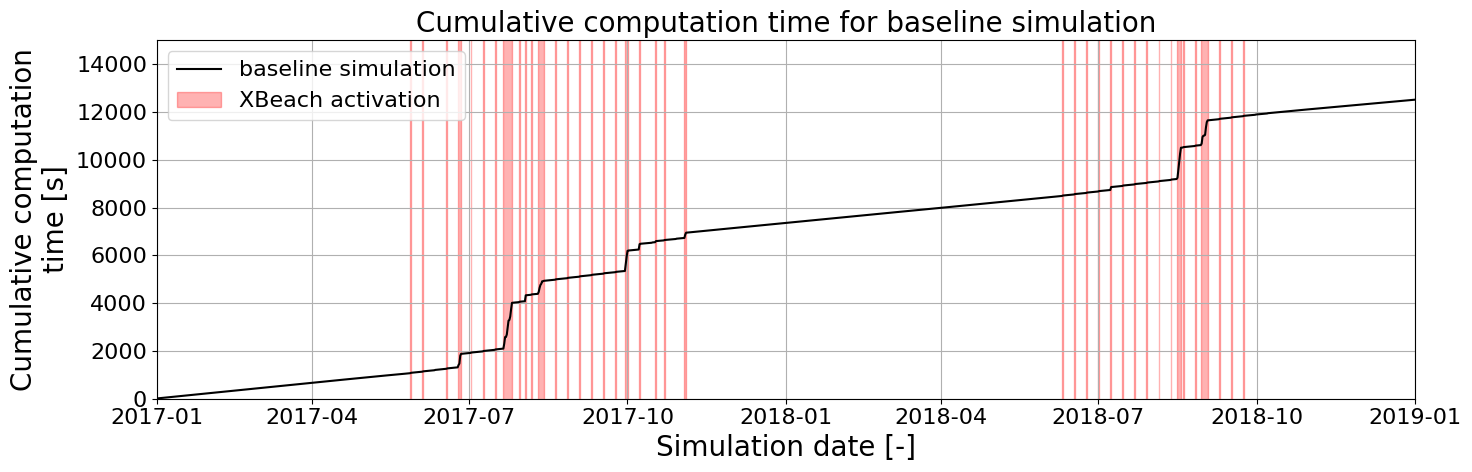

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(timestamps, comp_times, color='k', label='baseline simulation')

nonzero_mask = np.nonzero(xbeach_times)

# for i in xbeach_activation_gradient:
#     if date2 - date1 <= pd.to_timedelta("24h"):
#         ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='r')

for date1, date2 in date_pairs:
    ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='r')

    
        
ax.fill_between([0, 0], 0, 0, alpha=0.3, label='XBeach activation', color='r')

ax.set_xlabel('Simulation date [-]')
ax.set_ylabel('Cumulative computation\ntime [s]')

ax.set_title("Cumulative computation time for baseline simulation")

ax.set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2019-01-01")))
ax.set_ylim((0, 15000))

ax.grid()

ax.legend()

fig.tight_layout()

figname = 'computational_time_sa_base.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

In [11]:
xbeach_times = np.loadtxt(os.path.join(folder_path, Path("xbeach_times.txt")))
all_timestamps = pd.to_datetime(np.loadtxt(os.path.join(folder_path, Path("timestamps.txt"))))

date_pairs = []

for i in range(len(xbeach_times)):
    
    if xbeach_times[i] >= 1 and xbeach_times[i-1] == 0:
        date1 = all_timestamps[i]
        
        for j in range(len(xbeach_times[i:])-1):
            if xbeach_times[i:][j] >= 1 and xbeach_times[i:][j+1] == 0:

                date2 = all_timestamps[i:][j]
                
                if date2 - date1 > pd.Timedelta('1h'):
                
                    date_pairs.append((date1, date2))
                
                break
                    
            
    
print(date_pairs)

[(Timestamp('2017-06-25 11:00:00'), Timestamp('2017-06-25 13:00:00')), (Timestamp('2017-06-25 17:00:00'), Timestamp('2017-06-26 01:00:00')), (Timestamp('2017-07-21 04:00:00'), Timestamp('2017-07-21 22:00:00')), (Timestamp('2017-07-22 20:00:00'), Timestamp('2017-07-24 00:00:00')), (Timestamp('2017-07-24 19:00:00'), Timestamp('2017-07-25 17:00:00')), (Timestamp('2017-07-25 19:00:00'), Timestamp('2017-07-25 23:00:00')), (Timestamp('2017-08-02 12:00:00'), Timestamp('2017-08-02 21:00:00')), (Timestamp('2017-08-10 09:00:00'), Timestamp('2017-08-10 14:00:00')), (Timestamp('2017-08-10 21:00:00'), Timestamp('2017-08-11 02:00:00')), (Timestamp('2017-08-11 10:00:00'), Timestamp('2017-08-11 13:00:00')), (Timestamp('2017-08-12 00:00:00'), Timestamp('2017-08-12 03:00:00')), (Timestamp('2017-09-29 12:00:00'), Timestamp('2017-09-30 21:00:00')), (Timestamp('2017-10-07 12:00:00'), Timestamp('2017-10-07 15:00:00')), (Timestamp('2017-10-07 18:00:00'), Timestamp('2017-10-08 00:00:00')), (Timestamp('2017-11

In [18]:
runid = "sa_base"

folder_path = f"p:/11210070-usgscoop-202324-arcticxb/runs/{runid}"

print(runid)

sa_base


In [19]:
output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

['0000011376', '0000008280', '0000007776', '0000005088', '0000013488', '0000015876', '0000004764', '0000016416', '0000012108', '0000014340', '0000001596', '0000017196', '0000007968', '0000017352', '0000001752', '0000014184', '0000004260', '0000012660', '0000003972', '0000002028', '0000000960', '0000005748', '0000007272', '0000008784', '0000009204', '0000002244', '0000001092', '0000010248', '0000006648', '0000011760', '0000015012', '0000008820', '0000001128', '0000001344', '0000014592', '0000005436', '0000005844', '0000015516', '0000012276', '0000006120', '0000002652', '0000009612', '0000002496', '0000012924', '0000003636', '0000004392', '0000011544', '0000012792', '0000000624', '0000016224', '0000007380', '0000008676', '0000006600', '0000010200', '0000003828', '0000002172', '0000009132', '0000008868', '0000013212', '0000006168', '0000013908', '0000004452', '0000007440', '0000011040', '0000015732', '0000015984', '0000017208', '0000001608', '0000001464', '0000017064', '0000013716', '0000

In [35]:
total_volume_in_upper_bluff = []
timestamps = []

i = 1

# reference variables
max_distance_from_top = 5  # m
N = 10**5

# for output_id in output_ids:
    
#     fname = str(output_id + '.nc')
    
#     ds = xr.load_dataset(os.path.join(folder_path, fname))
    
#     xgr = ds.xgr.values
#     zgr = ds.zgr.values
#     timestamp = ds.timestamp.values
    
#     ds.close()
    
#     x_interp = np.linspace(xgr[0], xgr[-1], N)
#     z_interp = np.interp(x_interp, xgr, zgr)
        
#     z_mask_ = (z_interp > np.max(zgr) - max_distance_from_top)
        
#     V_from_top = trapezoid(z_mask_ * z_interp, x_interp)
#     V_from_threshold = trapezoid(z_mask_ * np.ones(z_interp.shape) * (np.max(zgr) - max_distance_from_top), x_interp)
    
#     V = V_from_top - V_from_threshold
    
#     total_volume_in_upper_bluff.append(V)
#     timestamps.append(timestamp)
    
#     print(f'finished {i}/{len(output_ids)}')
    
#     i += 1
    
# sort_mask = np.argsort(np.int32(output_ids))

# total_volume_in_upper_bluff = np.array(total_volume_in_upper_bluff)[sort_mask]
# timestamps = np.array(timestamps)[sort_mask]

# np.savetxt(f'{runid}_total_volume_in_upper_bluff.txt', total_volume_in_upper_bluff)
# np.savetxt(f'sa_base_total_volume_in_upper_bluff.txt', total_volume_in_upper_bluff)


comp_times = np.loadtxt('sa_base_computation-times.txt')
total_volume_in_upper_bluff_base = np.loadtxt('sa_base_total_volume_in_upper_bluff.txt')
total_volume_in_upper_bluff_lvl2_16 = np.loadtxt('sa_lvl2_16_total_volume_in_upper_bluff.txt')
timestep_ids = np.loadtxt('sa_base_timestep-ids.txt')
timestamps = pd.to_datetime(np.loadtxt("sa_base_timestamps.txt"))

In [36]:
volume_start = total_volume_in_upper_bluff_base[0]

volume_loss_base = volume_start - total_volume_in_upper_bluff_base
volume_loss_lvl2_16 = volume_start - total_volume_in_upper_bluff_lvl2_16

print(volume_loss_base)
print(volume_loss_lvl2_16)

[ 0.          0.          0.         ... 16.41467063 16.41467063
 16.41467063]
[ 0.          0.          0.         ... 19.09942856 19.09942856
 19.09942856]


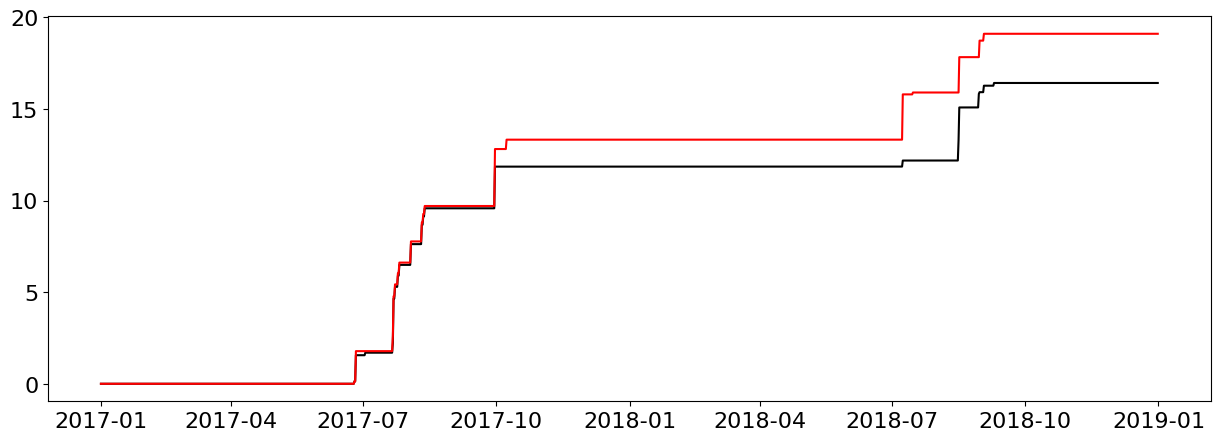

In [37]:
fig, ax = plt.subplots(figsize=(15, 5))

l1, = ax.plot(timestamps, volume_loss_base, color='k')
l2, = ax.plot(timestamps, volume_loss_lvl2_16, color='r')

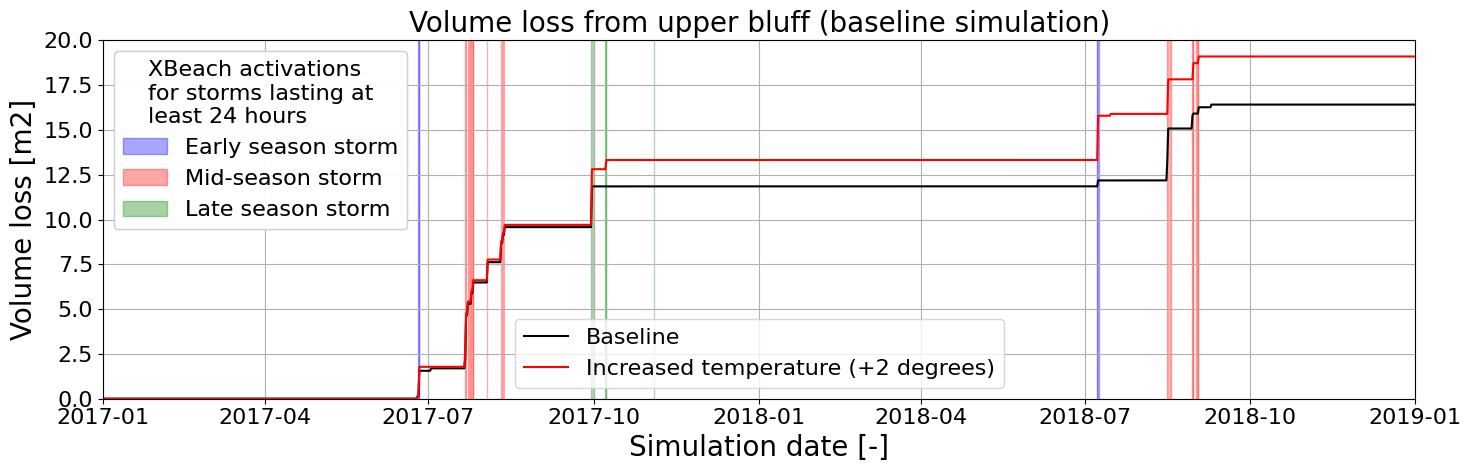

In [38]:
fig, ax = plt.subplots(figsize=(15, 5))

l1, = ax.plot(timestamps, volume_loss_base, color='k')
l2, = ax.plot(timestamps, volume_loss_lvl2_16, color='r')

for date1, date2 in date_pairs:
    if date1 > pd.to_datetime("2017-09-01") and date1 < pd.to_datetime("2017-12-01"):
        ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='g')
    elif date1 < pd.to_datetime("2017-07-01"):
        ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='b')
    else:
        ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='r')

p2 = ax.fill_between([0, 0], 0, 0, alpha=0.3, label='Early season storm', color='b')
p1 = ax.fill_between([0, 0], 0, 0, alpha=0.3, label='Mid-season storm', color='r')
p3 = ax.fill_between([0, 0], 0, 0, alpha=0.3, label='Late season storm', color='g')

ax.fill_between([pd.to_datetime("2018-07-08"), pd.to_datetime("2018-07-09")], -2000, 20000, alpha=0.3, color='b')

ax.set_xlabel('Simulation date [-]')
ax.set_ylabel('Volume loss [m2]')

ax.set_title("Volume loss from upper bluff (baseline simulation)")

ax.set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2019-01-01")))
ax.set_ylim((0, 20))

ax.grid()

leg1 = ax.legend([l1, l2], ['Baseline', 'Increased temperature (+2 degrees)'])
leg2 = ax.legend([p2, p1, p3], [p.get_label() for p in [p2, p1, p3]], title="XBeach activations\nfor storms lasting at\nleast 24 hours")

ax.add_artist(leg1)
ax.add_artist(leg2)

fig.tight_layout()

figname = 'volume_loss_sa_base.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)